In [2]:
%matplotlib notebook

from combine.philip_zb_w7xt_version2 import gen_grid
import tracer.W7X.make_W7X_grid_phg_test as w7xt
from matplotlib import cm, pyplot as plt
import ipywidgets as widgets
import numpy as np

from combine.quick_g import multi_bump, widget_g_plot
import combine.grid_analyze_version4 as ga

In [40]:
consts = {
    # in -> outside cell numbers (sum is redial resolution)
    "NirC": 30, "NirS": 40, "NirN": 40,
    # half(-1/2) poloidal and toroidal cell number (per half-module)
    "Niphalf": 150, "Nit": 36,
    # poloidal grid spacing and smoothing options implemented by phg
    "eq_space": True, "zoidpol": False,
    # proj for first (or all in not eq. space) vessel point(s)
    # eq_sp_v + normal_vessel projects first point from normal and others via equal spacing
    "eq_space_vessel": False,  "normal_vessel": True, "normal_smooth": 50,
    # strating angle in [0,Nit[ and offset list of projection center
    "trace_index": 13, "center_delta_R": .15, # [0,0,0,0.2,.15],
    # path to magnetic field file
    "magnetic_field_file": "./Fields/Field-FTM-high.dat", # ErrFullT- FullT-
    #"configuration": "FTM", # overwrites more specific changes
    "module": "half_module", # or "half_module" or "full_torus"
    # trace from 0 to ta and then rotate instead of the other way around
    # "project_trace_incorrectly": False, "project_trace_fully": False,
    "explicit_alpha_plot": True,
    "module_index": 0, # from 0 to 4 for starting position
    "surface_radii": [5.99, 6.09, 6.1751, np.linspace(6.2129, 6.2129001, 10)],
    "Rcax": 5.96957, "tr_acc": 720, 
    "shrink_fit_outer_surface": (30, 0.06, 0.002, 20, False),
}

(30, 0.06, 0.002, 20, True)


<IPython.core.display.Javascript object>


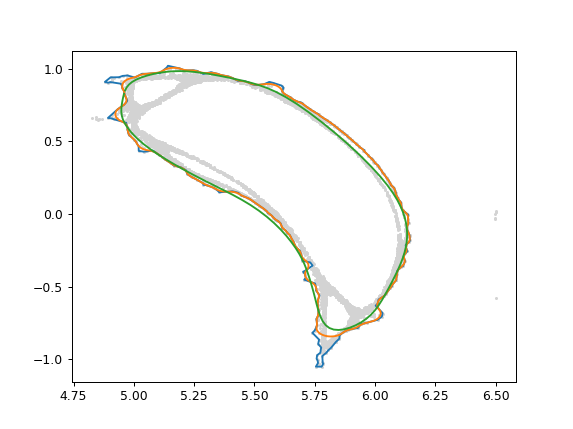

[21. 73.  5.  0.  0.  1.  4.]
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


In [41]:
g = gen_grid(consts, all_grids_folder=False)

<IPython.core.display.Javascript object>


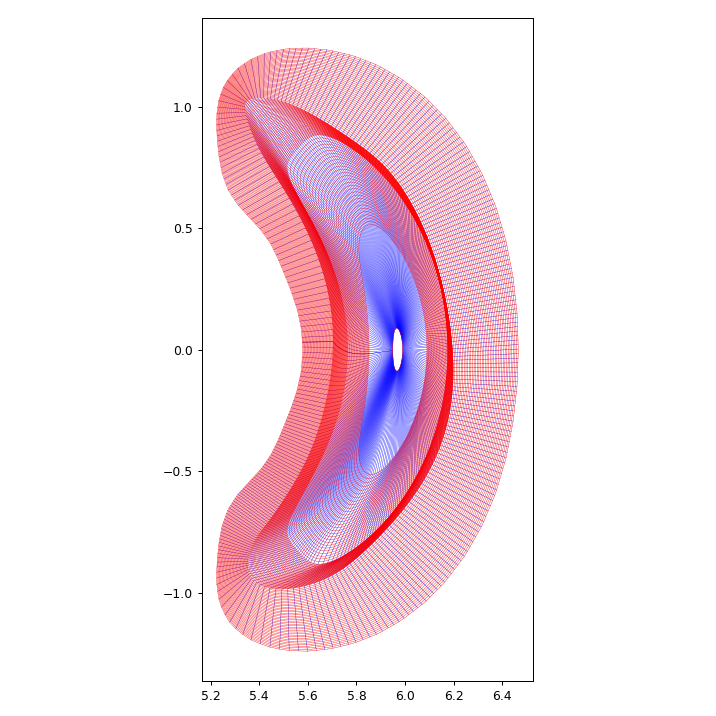

interactive(children=(IntSlider(value=33, description='phi', max=35), Output()), _dom_classes=('widget-interac…

In [45]:
widget_g_plot(g, phi=33)  # , Ri=107, THTi=112)

In [44]:
ret = np.nonzero(np.invert(ga.fast_convex(g)))
np.array(ret).T

array([], shape=(0, 3), dtype=int64)

In [48]:
g2 = np.load("/u/phg/grid/tracer/W7X/EMC3compliance/None-2022-05-13T10:22:19/0/grid.npz")["data"]

In [51]:
np.all(ga.fast_convex(g2))

True

In [9]:
g[0,0,:,2] * 180/np.pi

array([2.66516195e-12, 9.00000000e+00, 1.80000000e+01, 2.70000000e+01,
       3.60000000e+01, 4.50000000e+01, 5.40000000e+01, 6.30000000e+01,
       7.20000000e+01])

NameError: name 'np' is not defined